My son is two and my daughter will be here any day now. My wife and I have been trying to figure out how to pay for daycare for two kids, each one costing about the same as another mortgage payment. Just to stress myself out some more, I decided also to run a quick estimate of how much I should be saving to fund my children's college education. As it turns out, it's not much different than paying for daycare.

I'm using pandas, though it's not really necissary; numpy is probably all that's needed. I'm also pulling in matplotlib for pretty graphics. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

I'm using BU, where I currently work, as a reference. [It's roughly](http://www.bu.edu/admissions/apply/costs-aid-scholarships/tuition-and-fees/) $48,500 for tuition this year and $14,500 for room and board. If I keep working there and my children are admitted (and college is still a thing people do in 2030), they'll get a 90% discount. Not bad, but that's a lot of if's. I've seen quotes of 6-7% growth rate for tuition a year, but I can't imagine that will continue. There are a bunch of factors controlling that growth rate, from the ammount of government financial aid provided to the BabyBoomer's Super cycle that's given investments a boost. The higher-ups have already decided they can't really charge much more and don't want to increase the student population. So I'll use a slighlty smaller growth rate of 5% for tuition and perhapse a slightly higher rate 3% for room and board (my guess is that inflation will be closer to 2%). 

In [2]:
base_tuition = 48500
base_housing = 14500

rate_tuition = 0.05
rate_housing = 0.03

year = np.arange(22)
abs_year = 2013 + year

I have a simple method to calculate compounding growth on an annual basis that calls numpy's power method, which will nicely broadcast either the base of the exponent to match the other. I then use a mask to only account for the years I'll actually be paying. To reduce my chance of a stroke, I'm only looking at one childs cost. My index is the age of my son, and going forward I'll assume I haven't saved anything yet.

In [3]:
def calc_growth(initial, rate, start, nvals):
    return np.power(1+rate, np.arange(-start, nvals-start)) * initial 

yearly_tuition = calc_growth(base_tuition, rate_tuition, 2, 22)
yearly_housing = calc_growth(base_housing, rate_housing, 2, 22)
mask = np.zeros_like(year)
mask[18:22] = 1

df = pd.DataFrame(dict(
    abs_year = abs_year,
    tuition = yearly_tuition * mask,
    housing = yearly_housing * mask), index=year)
print(df)

    abs_year       housing        tuition
0       2013      0.000000       0.000000
1       2014      0.000000       0.000000
2       2015      0.000000       0.000000
3       2016      0.000000       0.000000
4       2017      0.000000       0.000000
5       2018      0.000000       0.000000
6       2019      0.000000       0.000000
7       2020      0.000000       0.000000
8       2021      0.000000       0.000000
9       2022      0.000000       0.000000
10      2023      0.000000       0.000000
11      2024      0.000000       0.000000
12      2025      0.000000       0.000000
13      2026      0.000000       0.000000
14      2027      0.000000       0.000000
15      2028      0.000000       0.000000
16      2029      0.000000       0.000000
17      2030      0.000000       0.000000
18      2031  23268.243367  105869.417537
19      2032  23966.290668  111162.888413
20      2033  24685.279388  116721.032834
21      2034  25425.837770  122557.084476


In [4]:
df['expenses'] = df.tuition + df.housing
print("total cost  = $ %.0f"%(df.expenses.sum()))

total cost  = $ 553656


As you can see above, I'll be paying over a million dollars to fund my children's education. How much do I need to start saving today to make that possible? Well let's say my investments return 6%, which is high or low depending on what assets I buy, when I shift the mix of assets, and how lucky I am. Next I'll treat each year's costs like a loan that I'll need to pay a bit of each year for the next 16 years, and that's how I'll figure the annual (and montly) payments.

In [5]:
investment_growth_rate = 0.06

total_payment = np.zeros_like(df.tuition)
start = 2

for index in range(18,22):
    total_payment[start:index-1] -= np.pmt(investment_growth_rate, index-start, 0, df.expenses[index])

print("I should be saving today: $%.0f annually, or %.2f monthly"%(total_payment[start], total_payment[start]/12))
df['payments'] = total_payment

I should be saving today: $18779 annually, or 1564.88 monthly


Now I'll simulate saving that much and withdrawing the tuition + room & board at the appropriate time.

In [6]:
account = [0, 0]
for i in range(2,22):
    account.append((account[-1] + df.payments[i] - df.expenses[i]) * ( 1 + investment_growth_rate))
df['account'] = account
print('account ending balance: $%.0f'%(df.account.values[-1]))

account ending balance: $15230


Oops, I'm off by $15K, but I'm ok with that (not really it's driving me bonkers because I can't figure out why). Let's just call that the cost of all the other expenses, books, etc. Oh, and here's the pretty graphic:

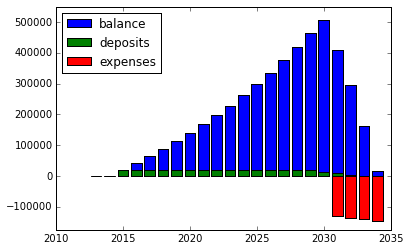

In [7]:
plt.bar(df.abs_year, df.account, label='balance', color='blue', align='center')
plt.bar(df.abs_year, df.payments, label='deposits', color='green', align='center')
plt.bar(df.abs_year, -df.expenses, label='expenses', color='red', align='center')
plt.legend(loc='upper left')
_ = plt.ylim(-175000, 550000)

So $1.5K a month, that's not much more than full time daycare. The problem I face now is I have another 3 years of daycare to pay and I'm having trouble finding the money to even do that. 

Now this is just a rough estimate, and there's much better things I can do. I can model a distributition of investment gains. I can run through different investment scenarios. I can model a variable deposit rate; maybe some  (probably most) years I won't be able to cover the ammount I should be saving. I could also look into what the tax implications are for saving outside a tax sheltered account, which would hedge for not going to college. It's probably silly to think that way, because college is increasingly important for people to make a decent wage these days. But I like the idea of keeping track of a non-zero chance of no college. 